In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
# loading data
csvpath = Path('../Project-03/combined_df.csv')
teamstats_df = pd.read_csv(csvpath)

In [3]:
teamstats_df.shape

(12738, 53)

In [4]:
# converting 'H/A' to 0/1's
teamstats_df['H_H/A'] = teamstats_df['H_H/A'].apply(lambda x: 1 if x=="vs" else 0)
teamstats_df['A_H/A'] = teamstats_df['A_H/A'].apply(lambda x: 1 if x=="vs" else 0)
teamstats_df[:5]

,Unnamed: 0,H_TEAM,H_TEAM1,H_H/A,H_TEAM2,GAMEDATE,H_W/L,H_MIN,H_PTS,H_FGM,...,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF,A_+/-
0,0,ATL,ATL,1,SAS,2021-04-18,W,53,114,42,...,86.4,9,38,47,27,12,5,6,21,-2
1,1,ATL,ATL,1,GSW,2021-04-18,L,48,100,37,...,68.0,13,34,47,30,21,15,7,17,1
2,2,ATL,ATL,1,IND,2021-04-18,W,48,116,42,...,82.9,13,26,39,24,11,8,4,24,-5
3,3,ATL,ATL,1,MIA,2021-04-18,L,63,109,36,...,78.3,14,42,56,25,22,6,6,35,7
4,4,ATL,ATL,1,BOS,2021-04-18,L,48,81,28,...,66.7,16,28,44,27,13,11,4,15,8


In [5]:
# converting 'W/L' to 0/1's
teamstats_df['H_W/L']=teamstats_df['H_W/L'].apply(lambda x: 1 if x=="W" else 0)
teamstats_df['A_W/L']=teamstats_df['A_W/L'].apply(lambda x: 1 if x=="W" else 0)
teamstats_df[:5]

,Unnamed: 0,H_TEAM,H_TEAM1,H_H/A,H_TEAM2,GAMEDATE,H_W/L,H_MIN,H_PTS,H_FGM,...,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF,A_+/-
0,0,ATL,ATL,1,SAS,2021-04-18,1,53,114,42,...,86.4,9,38,47,27,12,5,6,21,-2
1,1,ATL,ATL,1,GSW,2021-04-18,0,48,100,37,...,68.0,13,34,47,30,21,15,7,17,1
2,2,ATL,ATL,1,IND,2021-04-18,1,48,116,42,...,82.9,13,26,39,24,11,8,4,24,-5
3,3,ATL,ATL,1,MIA,2021-04-18,0,63,109,36,...,78.3,14,42,56,25,22,6,6,35,7
4,4,ATL,ATL,1,BOS,2021-04-18,0,48,81,28,...,66.7,16,28,44,27,13,11,4,15,8


In [6]:
# dropping unneeded columns
# subsequent analysis dropped '+/-' and 'PTS' columns
teamstats_df = teamstats_df.drop(columns=['Unnamed: 0',
                                          'H_TEAM',
                                          'A_TEAM',
                                          'H_TEAM1',
                                          'H_TEAM2',
                                          'A_TEAM1',
                                          'A_TEAM2',
                                          'GAMEDATE',
                                          'GAMEDATE.1',
                                          'A_H/A',
                                          'H_+/-',
                                          'A_+/-',
                                          'H_PTS',
                                          'A_PTS',
                                          'A_W/L',
                                         'H_FGM',
                                         'A_FGM',
                                         'H_REB',
                                         'A_REB',
                                         'H_FTM',
                                         'A_FTM',
                                         'H_FTA',
                                         'A_FTA'])

In [7]:
#teamstats_df['H_W/L'].value_counts()

In [8]:
#teamstats_df['A_W/L'].value_counts()

In [9]:
#teamstats_df['GAMEDATE'] = pd.to_datetime(teamstats_df['GAMEDATE'])
#teamstats_df['GAMEDATE.1'] = pd.to_datetime(teamstats_df['GAMEDATE.1'])

In [10]:
#new_teamstats_df = pd.get_dummies(teamstats_df, columns=['TEAM1','TEAM2']).head()


In [11]:
#new_teamstats_df.head()

In [12]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('H_W/L', axis=1, inplace=True)
X.head(16)

,H_H/A,H_MIN,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FT%,H_OREB,H_DREB,...,A_3PA,A_3P%,A_FT%,A_OREB,A_DREB,A_AST,A_TOV,A_STL,A_BLK,A_PF
0,1,53,92,45.7,14,28,50.0,59.3,11,35,...,27,33.3,86.4,9,38,27,12,5,6,21
1,1,48,80,46.3,10,31,32.3,84.2,7,34,...,27,22.2,68.0,13,34,30,21,15,7,17
2,1,48,82,51.2,10,32,31.3,91.7,4,36,...,27,37.0,82.9,13,26,24,11,8,4,24
3,1,63,94,38.3,6,22,27.3,67.4,15,36,...,28,28.6,78.3,14,42,25,22,6,6,35
4,1,48,68,41.2,10,29,34.5,78.9,8,28,...,16,18.8,66.7,16,28,27,13,11,4,15
5,1,48,87,42.5,15,39,38.5,63.2,14,27,...,18,27.8,91.7,11,35,20,9,7,6,20
6,1,48,91,47.3,10,24,41.7,76.9,14,45,...,34,14.7,55.6,12,29,23,14,11,7,17
7,1,48,77,45.5,18,39,46.2,84.4,4,30,...,27,33.3,74.1,7,34,27,4,4,6,23
8,1,48,83,56.6,9,12,75.0,100.0,4,27,...,14,42.9,80.0,17,26,21,20,8,5,9
9,1,48,72,44.4,13,25,52.0,82.6,8,29,...,17,29.4,100.0,8,31,20,21,10,4,21


In [13]:
teamstats_df.info('include=all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12738 entries, 0 to 12737
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H_H/A   12738 non-null  int64  
 1   H_W/L   12738 non-null  int64  
 2   H_MIN   12738 non-null  int64  
 3   H_FGA   12738 non-null  int64  
 4   H_FG%   12738 non-null  float64
 5   H_3PM   12738 non-null  int64  
 6   H_3PA   12738 non-null  int64  
 7   H_3P%   12738 non-null  float64
 8   H_FT%   12738 non-null  float64
 9   H_OREB  12738 non-null  int64  
 10  H_DREB  12738 non-null  int64  
 11  H_AST   12738 non-null  int64  
 12  H_TOV   12738 non-null  int64  
 13  H_STL   12738 non-null  int64  
 14  H_BLK   12738 non-null  int64  
 15  H_PF    12738 non-null  int64  
 16  A_MIN   12738 non-null  int64  
 17  A_FGA   12738 non-null  int64  
 18  A_FG%   12738 non-null  float64
 19  A_3PM   12738 non-null  int64  
 20  A_3PA   12738 non-null  int64  
 21  A_3P%   12738 non-null  float64
 22

In [14]:
# defining target vector
#y=teamstats_df['W/L'].values.reshape(-1,1)
# defining target vector
y=teamstats_df['H_W/L'].ravel()
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [15]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
# Creating StandardScaler instance
#scaler = StandardScaler()

# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [17]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=30, random_state=78)

In [19]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
#rf_model = rf_model.fit(X_train_scaled, y_train)

In [20]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)
#predictions = rf_model.predict(X_test_scaled)

In [21]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [22]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1142,204
Actual 1,193,1646


Accuracy Score : 0.875353218210361
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1346
           1       0.89      0.90      0.89      1839

    accuracy                           0.88      3185
   macro avg       0.87      0.87      0.87      3185
weighted avg       0.88      0.88      0.88      3185



In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [24]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1379582611635185, 'A_FG%'),
 (0.1360945862605066, 'H_FG%'),
 (0.06650731995102915, 'A_DREB'),
 (0.05959220813020092, 'H_DREB'),
 (0.05385046842827447, 'H_3P%'),
 (0.051442805118168414, 'A_3P%'),
 (0.03990032506866654, 'H_AST'),
 (0.03950007032217855, 'A_AST'),
 (0.0338028851071351, 'A_TOV'),
 (0.031999754197610024, 'H_TOV'),
 (0.029970031431058173, 'A_PF'),
 (0.02714511728646395, 'H_PF'),
 (0.02578370875080416, 'H_STL'),
 (0.0256665203729526, 'H_FT%'),
 (0.024320170071770068, 'A_STL'),
 (0.02414523720019316, 'A_3PM'),
 (0.02368448354235361, 'A_FT%'),
 (0.02135087526215271, 'H_3PM'),
 (0.020168753291892858, 'H_OREB'),
 (0.019355396635691698, 'H_FGA'),
 (0.018914845580875323, 'A_FGA'),
 (0.018750578163859687, 'A_3PA'),
 (0.0185017575211553, 'A_OREB'),
 (0.017009434592652674, 'H_3PA'),
 (0.015297529936132483, 'H_BLK'),
 (0.013782545361911834, 'A_BLK'),
 (0.002780675184351653, 'H_MIN'),
 (0.002723656066439778, 'A_MIN'),
 (0.0, 'H_H/A')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

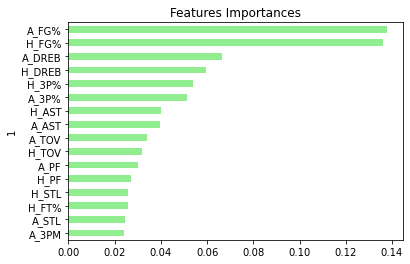

In [28]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)[:16])
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)